<a href="https://colab.research.google.com/github/Atharva2012/Projects/blob/main/iphone_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('iphone.csv')


print(df.head())

  productAsin country        date  isVerified  ratingScore  \
0  B09G9BL5CP   India  11-08-2024        True            4   
1  B09G9BL5CP   India  16-08-2024        True            5   
2  B09G9BL5CP   India  14-05-2024        True            4   
3  B09G9BL5CP   India  24-06-2024        True            5   
4  B09G9BL5CP   India  18-05-2024        True            5   

               reviewTitle                                  reviewDescription  \
0               No charger  Every thing is good about iPhones, there's not...   
1          iPhone 13 256GB  It look so fabulous, I am android user switche...   
2  Flip camera option nill  I tried to flip camera while recording but no ...   
3                  Product                                       100% genuine   
4             Good product         Happy to get the iPhone 13 in Amazon offer   

                                           reviewUrl  \
0  https://www.amazon.in/gp/customer-reviews/R345...   
1  https://www.amazon.in/gp/

In [3]:
print(df.isnull().sum())

productAsin           0
country               0
date                  0
isVerified            0
ratingScore           0
reviewTitle           0
reviewDescription    86
reviewUrl            16
reviewedIn            0
variant               0
variantAsin           0
dtype: int64


In [4]:
# Handle missing values in 'reviewDescription' and 'reviewUrl' columns
df['reviewDescription'].fillna('No description provided', inplace=True)
df['reviewUrl'].fillna('No URL provided', inplace=True)

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

<ipython-input-4-3d9513cb3600>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviewDescription'].fillna('No description provided', inplace=True)
<ipython-input-4-3d9513cb3600>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

<ipython-input-5-3fb44ad74454>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ratingScore', data=df, palette='coolwarm')


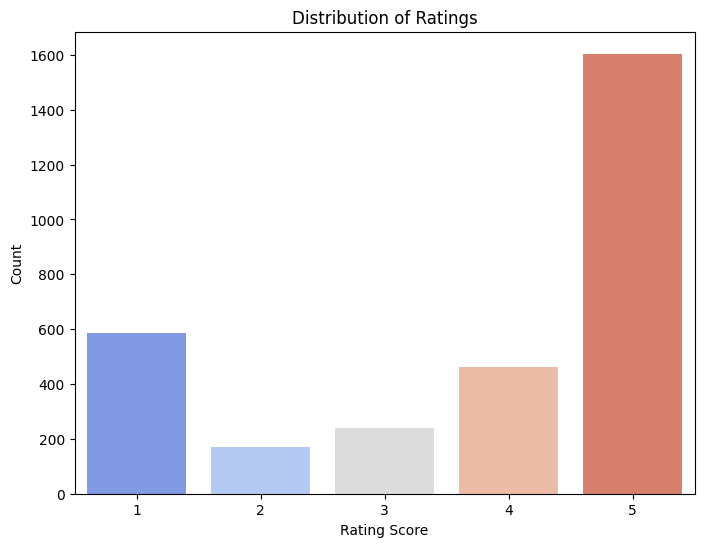

<ipython-input-5-3fb44ad74454>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('date').resample('M').size().plot()


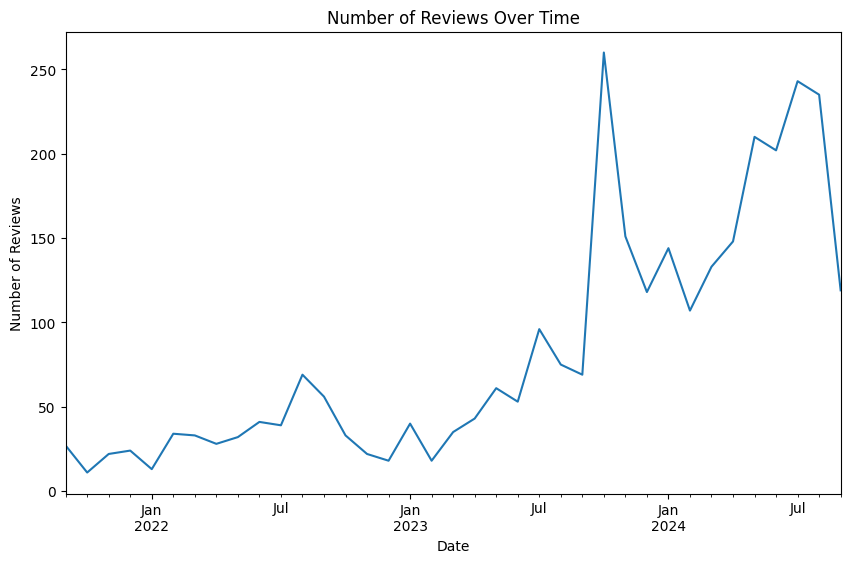

<ipython-input-5-3fb44ad74454>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='country', data=df, order=df['country'].value_counts().index, palette='viridis')


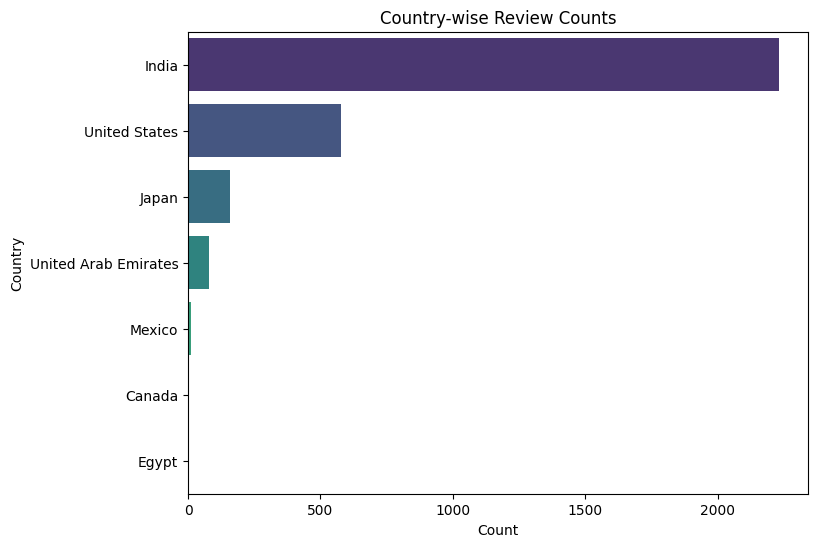

In [5]:
# 1. Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='ratingScore', data=df, palette='coolwarm')
plt.title('Distribution of Ratings')
plt.xlabel('Rating Score')
plt.ylabel('Count')
plt.show()

# 2. Reviews over time
plt.figure(figsize=(10, 6))
df.set_index('date').resample('M').size().plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

# 3. Country-wise Review Counts
plt.figure(figsize=(8, 6))
sns.countplot(y='country', data=df, order=df['country'].value_counts().index, palette='viridis')
plt.title('Country-wise Review Counts')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()